# Zomato Restaurant Data Analysis and Visualization

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('default')  # Changed from 'seaborn-v0_8' to avoid version issues
sns.set_palette("husl")

print("🍽️ Zomato Restaurant Data Analysis")
print("=" * 50)




🍽️ Zomato Restaurant Data Analysis


# DATA LOADING AND PREPROCESSING


In [12]:

# Load the Excel file (upload your zomato_data.xlsx to Colab first)
# Load both sheets
df_restaurants = pd.read_excel('zomato_data.xlsx', sheet_name='Sheet1')
df_countries = pd.read_excel('zomato_data.xlsx', sheet_name='Sheet2')

print(f"📊 Dataset Overview:")
print(f"   • Restaurants: {len(df_restaurants):,} records")
print(f"   • Countries: {len(df_countries):,} records")
print(f"   • Columns: {len(df_restaurants.columns)}")

# Display basic info
print("\n📋 Dataset Info:")
df_restaurants.info()



📊 Dataset Overview:
   • Restaurants: 9,551 records
   • Countries: 15 records
   • Columns: 29

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_deliver

# DATA CLEANING

In [13]:


print("\n🧹 Data Cleaning...")

# Remove duplicates
df_restaurants.drop_duplicates(inplace=True)

# Clean column names
df_restaurants.columns = df_restaurants.columns.str.strip()

# Handle missing values
missing_data = df_restaurants.isnull().sum()
print(f"\n❓ Missing Data Summary:")
print(missing_data[missing_data > 0])

# Convert data types
df_restaurants['Rating'] = pd.to_numeric(df_restaurants['Rating'], errors='coerce')
df_restaurants['Votes'] = pd.to_numeric(df_restaurants['Votes'], errors='coerce')
df_restaurants['Average_Cost_for_two'] = pd.to_numeric(df_restaurants['Average_Cost_for_two'], errors='coerce')

# Create price category
df_restaurants['Price_Category'] = df_restaurants['Price_range'].map({
    1: 'Budget',
    2: 'Mid-range',
    3: 'Expensive',
    4: 'Fine Dining'
})

# Merge with country data
df_restaurants = df_restaurants.merge(df_countries, left_on='CountryCode', right_on='countryID', how='left')

print("✅ Data cleaning completed!")

# =============================================================================
# EXPLORATORY DATA ANALYSIS
# =============================================================================

print("\n🔍 EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Basic statistics
print("\n📈 Key Statistics:")
print(f"   • Average Rating: {df_restaurants['Rating'].mean():.2f}")
print(f"   • Average Cost for Two: ${df_restaurants['Average_Cost_for_two'].mean():.2f}")
print(f"   • Total Votes: {df_restaurants['Votes'].sum():,}")
print(f"   • Unique Cities: {df_restaurants['City'].nunique()}")
print(f"   • Unique Cuisines: {df_restaurants['Cuisines'].nunique()}")





🧹 Data Cleaning...

❓ Missing Data Summary:
Cuisines          9
Unnamed: 20    9551
Cuisines 1        9
Cuisines 2     3403
Cuisines 3     6847
Cuisines 4     8687
Cuisines 5     9271
Cuisines 6     9435
Cuisines 7     9509
Cuisines 8     9537
dtype: int64
✅ Data cleaning completed!

🔍 EXPLORATORY DATA ANALYSIS

📈 Key Statistics:
   • Average Rating: 2.89
   • Average Cost for Two: $1199.21
   • Total Votes: 1,498,645
   • Unique Cities: 141
   • Unique Cuisines: 1825


# VISUALIZATION 1: RATING DISTRIBUTION


In [14]:

# Create a comprehensive visualization dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Rating Distribution', 'Price Range Distribution',
                   'Top 10 Cities by Restaurant Count', 'Online Delivery vs Table Booking'),
    specs=[[{"type": "histogram"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "scatter"}]]
)

# Rating distribution
fig.add_trace(
    go.Histogram(x=df_restaurants['Rating'], nbinsx=20, name='Rating Distribution'),
    row=1, col=1
)

# Price range distribution
price_counts = df_restaurants['Price_Category'].value_counts()
fig.add_trace(
    go.Bar(x=price_counts.index, y=price_counts.values, name='Price Categories'),
    row=1, col=2
)

# Top cities
top_cities = df_restaurants['City'].value_counts().head(10)
fig.add_trace(
    go.Bar(x=top_cities.values, y=top_cities.index, orientation='h', name='Top Cities'),
    row=2, col=1
)

# Online delivery vs table booking
delivery_booking = df_restaurants.groupby(['Has_Online_delivery', 'Has_Table_booking']).size().reset_index(name='count')
fig.add_trace(
    go.Scatter(x=delivery_booking['Has_Online_delivery'], y=delivery_booking['Has_Table_booking'],
              marker=dict(size=delivery_booking['count']*2, sizemode='diameter'),
              mode='markers+text', text=delivery_booking['count'], name='Delivery vs Booking'),
    row=2, col=2
)

fig.update_layout(height=800, title_text="🍽️ Zomato Restaurant Analysis Dashboard", showlegend=False)
fig.show()




# VISUALIZATION 2: CUISINE ANALYSIS

In [15]:



print("\n🍜 CUISINE ANALYSIS")

# Top cuisines
top_cuisines = df_restaurants['Cuisines'].value_counts().head(15)

fig_cuisine = px.bar(
    x=top_cuisines.values,
    y=top_cuisines.index,
    orientation='h',
    title='🍜 Top 15 Most Popular Cuisines',
    labels={'x': 'Number of Restaurants', 'y': 'Cuisine Type'},
    color=top_cuisines.values,
    color_continuous_scale='viridis'
)
fig_cuisine.update_layout(height=600)
fig_cuisine.show()






🍜 CUISINE ANALYSIS


# VISUALIZATION 3: RATING VS COST ANALYSIS

In [ ]:


print("\n💰 RATING VS COST ANALYSIS")

# Rating vs Cost scatter plot
fig_cost = px.scatter(
    df_restaurants,
    x='Average_Cost_for_two',
    y='Rating',
    color='Price_Category',
    size='Votes',
    hover_data=['RestaurantName', 'City', 'Cuisines'],
    title='💰 Restaurant Rating vs Average Cost (Size = Votes)',
    labels={'Average_Cost_for_two': 'Average Cost for Two', 'Rating': 'Rating'}
)
fig_cost.update_layout(height=600)
fig_cost.show()

# Box plot: Rating by Price Category
fig_box = px.box(
    df_restaurants,
    x='Price_Category',
    y='Rating',
    title='📊 Rating Distribution by Price Category',
    color='Price_Category'
)
fig_box.show()



# VISUALIZATION 4: GEOGRAPHICAL ANALYSIS


In [16]:

print("\n🗺️ GEOGRAPHICAL ANALYSIS")

# Top countries
country_analysis = df_restaurants.groupby('country name').agg({
    'RestaurantID': 'count',
    'Rating': 'mean',
    'Average_Cost_for_two': 'mean'
}).round(2).reset_index()
country_analysis.columns = ['Country', 'Restaurant_Count', 'Avg_Rating', 'Avg_Cost']
country_analysis = country_analysis.sort_values('Restaurant_Count', ascending=False)

fig_country = px.bar(
    country_analysis.head(10),
    x='Country',
    y='Restaurant_Count',
    title='🌍 Top 10 Countries by Restaurant Count',
    color='Avg_Rating',
    color_continuous_scale='RdYlGn'
)
fig_country.show()

# Create a map (if you have valid coordinates)
def create_restaurant_map(df, sample_size=1000):
    """Create an interactive map of restaurants"""
    # Sample data for performance
    df_sample = df.sample(min(sample_size, len(df)))

    # Filter valid coordinates
    df_map = df_sample.dropna(subset=['Latitude', 'Longitude'])
    df_map = df_map[(df_map['Latitude'] != 0) & (df_map['Longitude'] != 0)]

    if len(df_map) > 0:
        # Create base map
        center_lat = df_map['Latitude'].mean()
        center_lon = df_map['Longitude'].mean()

        m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

        # Add markers
        for idx, row in df_map.iterrows():
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=5,
                popup=f"<b>{row['RestaurantName']}</b><br>Rating: {row['Rating']}<br>Cuisine: {row['Cuisines']}",
                color='red' if row['Rating'] < 3 else 'orange' if row['Rating'] < 4 else 'green',
                fill=True
            ).add_to(m)

        return m
    return None

# Create map
restaurant_map = create_restaurant_map(df_restaurants)
if restaurant_map:
    print("🗺️ Interactive restaurant map created! (Display in Colab)")
    # restaurant_map  # Uncomment this line in Colab to display the map




🗺️ GEOGRAPHICAL ANALYSIS


🗺️ Interactive restaurant map created! (Display in Colab)


# VISUALIZATION 5: SERVICE ANALYSIS



🚚 SERVICE ANALYSIS



🧮 ADVANCED ANALYTICS


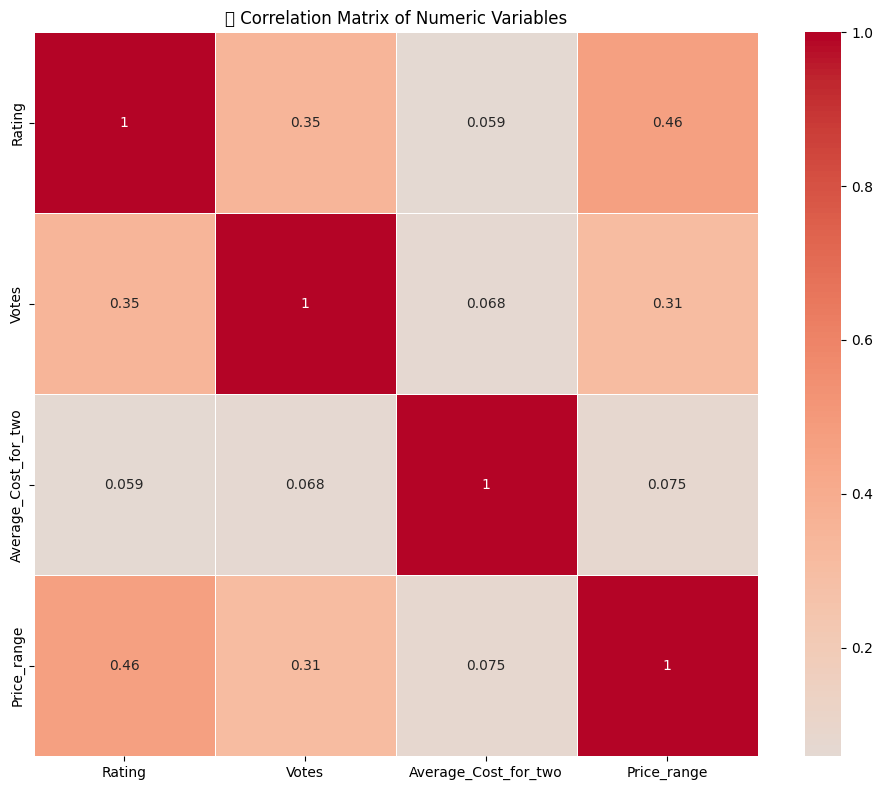


🏙️ Top 10 Cities Analysis:
              Restaurant_Count  Avg_Rating  Avg_Cost  Total_Votes
City                                                             
New Delhi                 5473        2.70    596.09       628340
Gurgaon                   1118        2.86    714.02       132160
Noida                     1080        2.39    539.49        73488
Faridabad                  251        2.27    447.61         6486
Ghaziabad                   25        2.93    602.00         2366
Bhubaneshwar                21        3.98    678.57         4243
Lucknow                     21        4.20    859.52         9130
Guwahati                    21        4.19    821.43         4964
Ahmedabad                   21        4.16    857.14        12266
Amritsar                    21        3.69    480.95         3665

⭐ Rating-wise Insights:
        RestaurantID  Average_Cost_for_two    Votes
Rating                                             
1.0             2148                340.34     0.87

'\nfig.write_html("zomato_dashboard.html")\nfig_cuisine.write_html("cuisine_analysis.html")\nfig_cost.write_html("rating_vs_cost.html")\nfig_country.write_html("country_analysis.html")\nfig_services.write_html("service_analysis.html")\n'

In [17]:

print("\n🚚 SERVICE ANALYSIS")

# Service availability analysis
services = ['Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now']
service_data = []

for service in services:
    yes_count = (df_restaurants[service] == 'Yes').sum()
    no_count = (df_restaurants[service] == 'No').sum()
    service_data.append({'Service': service.replace('_', ' ').replace('Has ', ''),
                        'Available': yes_count, 'Not Available': no_count})

service_df = pd.DataFrame(service_data)

fig_services = go.Figure()
fig_services.add_trace(go.Bar(name='Available', x=service_df['Service'], y=service_df['Available']))
fig_services.add_trace(go.Bar(name='Not Available', x=service_df['Service'], y=service_df['Not Available']))

fig_services.update_layout(
    title='🚚 Restaurant Service Availability',
    barmode='group',
    xaxis_title='Service Type',
    yaxis_title='Number of Restaurants'
)
fig_services.show()

# =============================================================================
# ADVANCED ANALYTICS
# =============================================================================

print("\n🧮 ADVANCED ANALYTICS")
print("=" * 30)

# Correlation analysis
numeric_cols = ['Rating', 'Votes', 'Average_Cost_for_two', 'Price_range']
correlation_matrix = df_restaurants[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('🔗 Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# City-wise analysis
city_analysis = df_restaurants.groupby('City').agg({
    'RestaurantID': 'count',
    'Rating': 'mean',
    'Average_Cost_for_two': 'mean',
    'Votes': 'sum'
}).round(2)
city_analysis.columns = ['Restaurant_Count', 'Avg_Rating', 'Avg_Cost', 'Total_Votes']
city_analysis = city_analysis.sort_values('Restaurant_Count', ascending=False).head(10)

print("\n🏙️ Top 10 Cities Analysis:")
print(city_analysis)

# Rating insights
rating_insights = df_restaurants.groupby('Rating').agg({
    'RestaurantID': 'count',
    'Average_Cost_for_two': 'mean',
    'Votes': 'mean'
}).round(2)

print("\n⭐ Rating-wise Insights:")
print(rating_insights)

# =============================================================================
# BUSINESS INSIGHTS
# =============================================================================

print("\n💡 KEY BUSINESS INSIGHTS")
print("=" * 40)

insights = [
    f"📊 Dataset contains {len(df_restaurants):,} restaurants across {df_restaurants['City'].nunique()} cities",
    f"⭐ Average rating: {df_restaurants['Rating'].mean():.2f}/5.0",
    f"💰 Average cost for two: ${df_restaurants['Average_Cost_for_two'].mean():.2f}",
    f"🍜 Most popular cuisine: {df_restaurants['Cuisines'].mode().iloc[0]}",
    f"🏙️ City with most restaurants: {df_restaurants['City'].mode().iloc[0]}",
    f"🚚 Online delivery availability: {(df_restaurants['Has_Online_delivery'] == 'Yes').sum()/len(df_restaurants)*100:.1f}%",
    f"🪑 Table booking availability: {(df_restaurants['Has_Table_booking'] == 'Yes').sum()/len(df_restaurants)*100:.1f}%"
]

for insight in insights:
    print(insight)

# Export cleaned data
print("\n💾 Exporting cleaned data...")
df_restaurants.to_csv('zomato_cleaned_data.csv', index=False)
print("✅ Cleaned data exported as 'zomato_cleaned_data.csv'")

print("\n🎉 Analysis Complete!")
print("=" * 50)
print("📋 Summary of visualizations created:")
print("   1. 📊 Multi-panel dashboard with key metrics")
print("   2. 🍜 Cuisine popularity analysis and word cloud")
print("   3. 💰 Rating vs Cost analysis")
print("   4. 🌍 Geographical distribution")
print("   5. 🚚 Service availability analysis")
print("   6. 🔗 Correlation heatmap")
print("\n💡 All visualizations are interactive and can be saved as HTML files!")

# Optional: Save all plots as HTML
# Uncomment the following lines to save plots
"""
fig.write_html("zomato_dashboard.html")
fig_cuisine.write_html("cuisine_analysis.html")
fig_cost.write_html("rating_vs_cost.html")
fig_country.write_html("country_analysis.html")
fig_services.write_html("service_analysis.html")
"""